# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### <span style="color:blue">  Svolgimento</span>

Le correzioni di coda, dovute al raggio di cutoff, possono essere stimate mediante l'utilizzo della densità di distribuzione radiale $g(r)$. È possibile dimostrare che le correzioni di coda sono date da: 
$$ \langle V \rangle_{tail} = 2 \pi \rho N \int_{r_c}^{\infty}r^2v(r)g(r) \, dr $$

Per $r>r_c$ si ha che le posizioni sono equiprobabili, ne consegue che $g(r)=1$, si ottengono quindi le seguenti correzioni:
$$ \frac{\langle V_{LJ}\rangle_{tail}}{N}= 8 \pi \rho_{LJ}\epsilon \left( \frac{1}{9r_{c,LJ}^9} - \frac{1}{3r_{c,LJ}^3} \right)$$
$$ \frac{\langle W_{LJ}\rangle_{tail}}{3N\epsilon}= 32 \pi \rho_{LJ}\left( \frac{1}{9r_{c,LJ}^9} - \frac{1}{6r_{c,LJ}^3} \right)$$

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### <span style="color:blue">  Svolgimento</span>

Per cercare di ottenere un'accettazione di circa 50% si sono utilizzati i seguenti valori di delta:

1. $\delta_{Solid}= 0.058$

2. $\delta_{Liquid}= 0.12$

3. $\delta_{Gas}= 7.75$

Successivamente è stato termalizzato il sistema osservando la stabilizzazione dell'energia potenziale della particella.

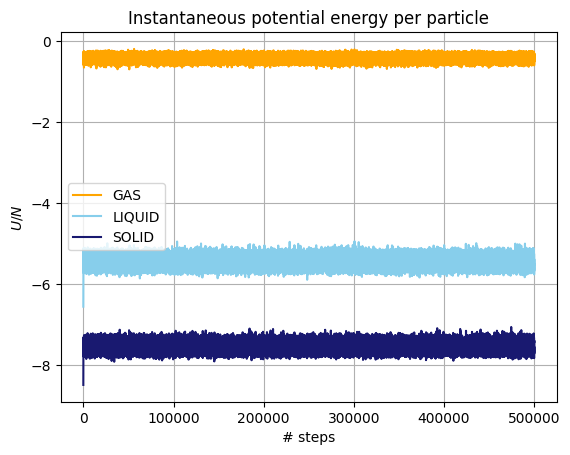

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

pe_gas = []
pe_liquid = []
pe_solid = []

with open('GOFR/OUTPUT/Esercizio_07_02/GAS/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_gas.append(float(elements[1]))
file.close()

with open('GOFR/OUTPUT/Esercizio_07_02/LIQUID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_liquid.append(float(elements[1]))
file.close()

with open('GOFR/OUTPUT/Esercizio_07_02/SOLID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_solid.append(float(elements[1]))
file.close()

N = np.arange(1,len(pe_gas)+1)

plt.plot(N,pe_gas,label='GAS', color="orange")
plt.plot(N,pe_liquid,label='LIQUID', color="skyblue")
plt.plot(N,pe_solid,label='SOLID', color="midnightblue")
plt.ylabel(r'$U/N$')
plt.xlabel('# steps')
plt.title('Instantaneous potential energy per particle')
plt.legend()
plt.grid(True)
plt.show()

### Autocorrelazione

L'autocorrelazione è una misura di quanto il sistema è correlato ad una copia futura di sé stesso. È fondamentale per il nostro studio perche gli step successivi di Metropolis saranno correlati, e di conseguenza è opportuno scegliere, nel data blocking, una dimensione dei blocchi tale da superare di molto il tempo di correlazione delle misure. In questo modo le medie a blocchi saranno davvero campioni indipendenti e si potrà procedere nell'analisi senza il timore che i dati siano inficiati dalla correlazione interna tra di loro.

L'autocorrelazione $\chi(n)$ è una funzione degli step di Metropolis e ha un andamento esponenziale decrescente. Di seguito si riportano i risultati dell'autocorrelazione nella simulazione, che hanno permesso di identificare la larghezza di ogni blocco.

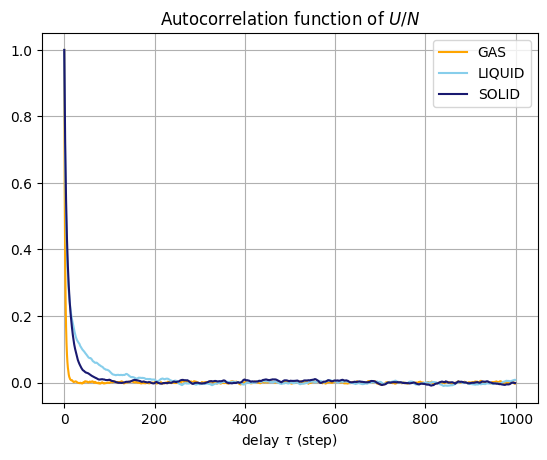

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

pe_gas = []
pe_liquid = []
pe_solid = []

with open('GOFR/OUTPUT/Esercizio_07_02/GAS/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_gas.append(float(elements[1]))
file.close()

with open('GOFR/OUTPUT/Esercizio_07_02/LIQUID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_liquid.append(float(elements[1]))
file.close()

with open('GOFR/OUTPUT/Esercizio_07_02/SOLID/potential_energy.dat', 'r') as file:
    import csv
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        pe_solid.append(float(elements[1]))
file.close()

max_lag = 1000
N = np.arange(0,max_lag)

def autocorrelation(data, max_lag):
    t_max = len(data)
    mean = np.mean(data)
    var = np.var(data)
    acf = []

    for t in range(max_lag):
        cov = np.mean([data[tprime] * data[tprime + t] for tprime in range(t_max - t)]) - \
              np.mean([data[tprime] for tprime in range(t_max - t)]) * \
              np.mean([data[tprime + t] for tprime in range(t_max - t)])
        acf.append(cov / var)

    return np.array(acf)

ac_gas = autocorrelation(pe_gas,max_lag)
ac_liquid = autocorrelation(pe_liquid,max_lag)
ac_solid = autocorrelation(pe_solid,max_lag)

N = np.arange(0,max_lag)

plt.plot(N,ac_gas,label='GAS', color="orange")
plt.plot(N,ac_liquid,label='LIQUID', color="skyblue")
plt.plot(N,ac_solid,label='SOLID', color="midnightblue")
plt.title(r'Autocorrelation function of $U/N$')
plt.xlabel(r'delay $\tau$ (step)')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import math

def error(AV,AV2,n): # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)

L = [10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 625, 1000]

M=500000 # Total number of throws

file = open('GOFR/OUTPUT/Esercizio_07_02/sigma-gas.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_gas[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_gas[l]*pe_gas[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()

file = open('GOFR/OUTPUT/Esercizio_07_02/sigma-liquid.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_liquid[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_liquid[l]*pe_liquid[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()

file = open('GOFR/OUTPUT/Esercizio_07_02/sigma-solid.out','w')

for i in range(len(L)): # ciclo for sugli elementi di L (array di numeri di passi per blocco)
    N = int(M/L[i])     # per l'i-esima iterazione ci sono N blocchi
    ave = np.zeros(N)     # Empty array of dimension M/i
    av2 = np.zeros(N)
    sum_prog = 0
    su2_prog = 0
    for j in range(N): # loop over the number of blocks
        sum1 = 0 
        sum2 = 0
        for k in range(L[i]): # for loop that iterates over the throws of each block
            l = k+j*L[i]
            sum1 += pe_solid[l]   # sum of the L numbers randomly generated in the i-th block
            sum2 += pe_solid[l]*pe_solid[l] #PROVA
        ave[j] = sum1/L[i]     # r_i 
        av2[j] = ave[j]**2 # (r_i)^2
    for j in range(N):
        sum_prog += ave[j] # SUM_{j=0,i} r_j
        su2_prog += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog/=N # Cumulative average
    su2_prog/=N # Cumulative square average
    file.write(str(error(sum_prog,su2_prog,N)) + '\n')

file.close()



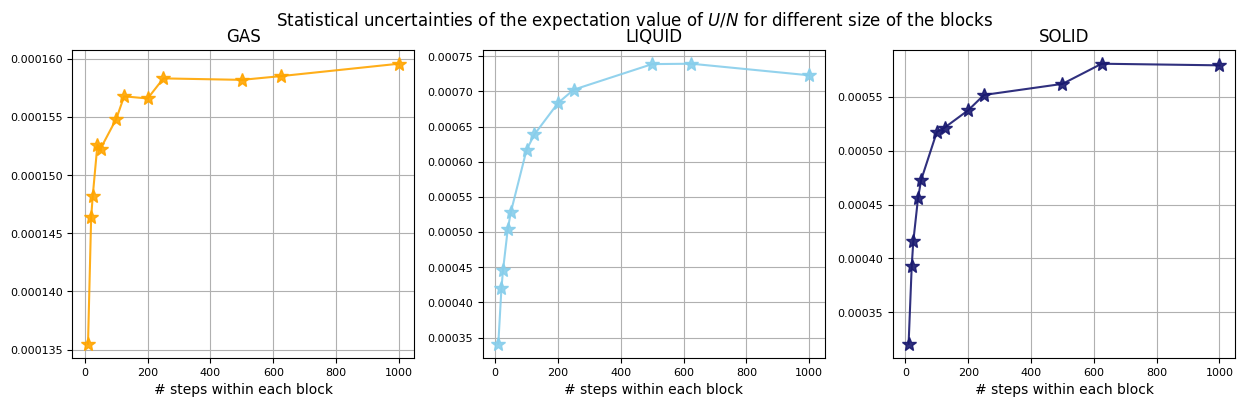

In [7]:
sigma_gas = np.loadtxt('GOFR/OUTPUT/Esercizio_07_02/sigma-gas.out')
sigma_liquid = np.loadtxt('GOFR/OUTPUT/Esercizio_07_02/sigma-liquid.out')
sigma_solid = np.loadtxt('GOFR/OUTPUT/Esercizio_07_02/sigma-solid.out')

fig, plts = plt.subplots(1, 3, figsize=(15, 4))

plts[0].plot(L, sigma_gas, marker='*', color="orange", markersize=10,linestyle='-',alpha=0.9)
plts[0].set_title('GAS')
plts[1].plot(L, sigma_liquid, marker='*',color='skyblue',markersize=10,linestyle='-',alpha=0.9)
plts[1].set_title('LIQUID')
plts[2].plot(L, sigma_solid, marker='*',color='midnightblue',markersize=10,linestyle='-',alpha=0.9)
plts[2].set_title('SOLID')

for i in range(3):
    plts[i].tick_params(axis='both', which='major', labelsize=8)
    plts[i].set_xlabel('# steps within each block')
    plts[i].grid(True)

fig.suptitle(r'Statistical uncertainties of the expectation value of $U/N$ for different size of the blocks')

plt.show()

Come si evince dal grafico degli errori, si ha che per i primi 200 steps l'errore viene sottostimato a causa della presenza dell'autocorrelazione.

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### <span style="color:blue">  Svolgimento</span>

Data l'espressione analitica di $g(r)$:
$$g(r)=\frac{1}{\rho N \Delta V(r)} \langle \sum \sum_{i \neq j = 1 }^{N} \delta \left[ ( \vec{r} | - | \vec{r_i}-\vec{r_j}|) \right]  \rangle $$ 

La funzione è stata implementata con un istogramma di 500 bins e incrementando di 2 un contatore ogni volta che 2 particelle venivano trovate a una distanza corrispondente a quella del bin.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### <span style="color:blue">  Svolgimento</span>

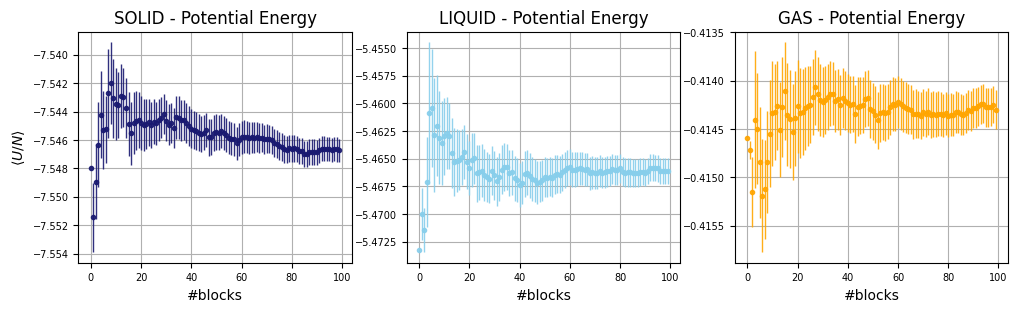

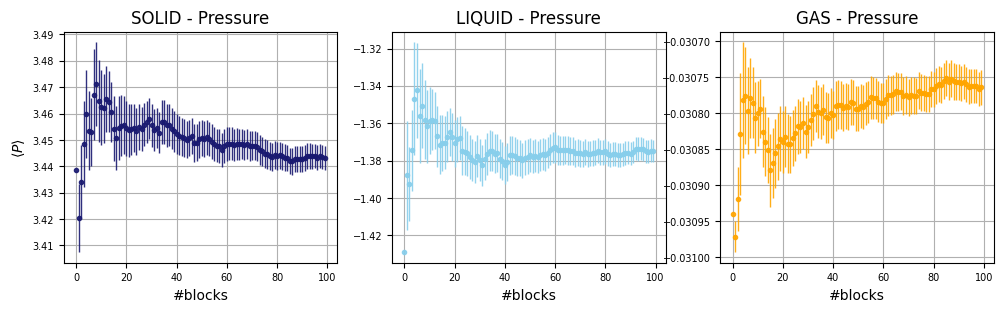

In [11]:
fig2, pe = plt.subplots(1, 3, figsize=(12, 3))
fig5, pr = plt.subplots(1, 3, figsize=(12, 3))

sim = ["SOLID","LIQUID","GAS"]
colors = ['midnightblue','skyblue','orange']

for i in range(3):
    mean = []
    sigma = []
    with open('GOFR/OUTPUT/Esercizio_07_04/NVT/'+sim[i]+"/potential_energy.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pe[i].errorbar(range(len(mean)), mean,yerr=sigma, marker='o', markersize=3, linestyle='', elinewidth=1, alpha=0.9, color=colors[i])
    pe[i].set_xlabel('#blocks')
    pe[0].set_ylabel(r'$\langle U/N \rangle$')
    pe[i].set_title(sim[i]+" - Potential Energy")
    pe[i].grid(True)
    pe[i].tick_params(axis='both', which='major', labelsize=7)

for i in range(3):
    mean = []
    sigma = []
    with open('GOFR/OUTPUT/Esercizio_07_04/NVT/'+sim[i]+"/pressure.dat", 'r') as file:
        reader = csv.reader(file)
        next(reader, None) # salta la prima riga
        for list in file:
            elements = list.split()
            mean.append(float(elements[2]))
            sigma.append(float(elements[3]))
    file.close()
    pr[i].errorbar(range(len(mean)), mean,yerr=sigma, marker='o', markersize=3, linestyle='', elinewidth=1, alpha=0.9, color=colors[i])
    pr[i].set_xlabel('#blocks')
    pr[0].set_ylabel(r'$\langle P \rangle$')
    pr[i].set_title(sim[i]+" - Pressure")
    pr[i].grid(True)
    pr[i].tick_params(axis='both', which='major', labelsize=7)

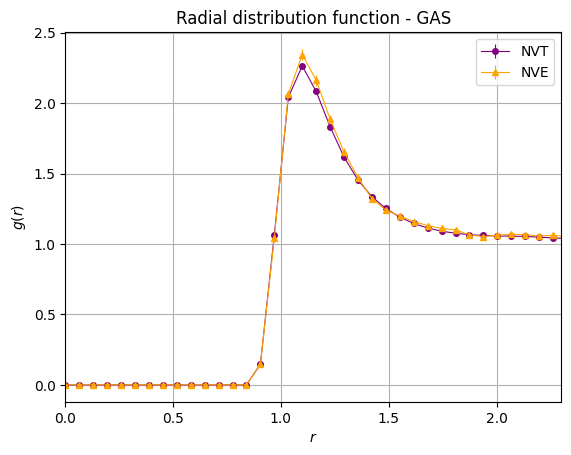

In [27]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVT/GAS/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='purple', alpha=1)

nbin = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVE/GAS/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='orange', alpha=1)
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - GAS')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()

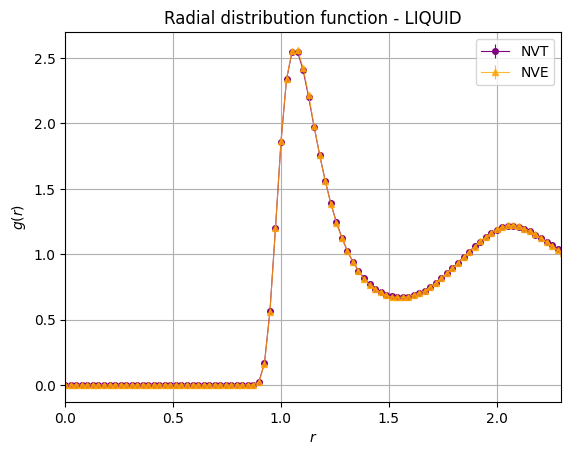

In [28]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVT/LIQUID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='purple', alpha=1)

nbin = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVE/LIQUID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='orange', alpha=0.8)
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - LIQUID')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()

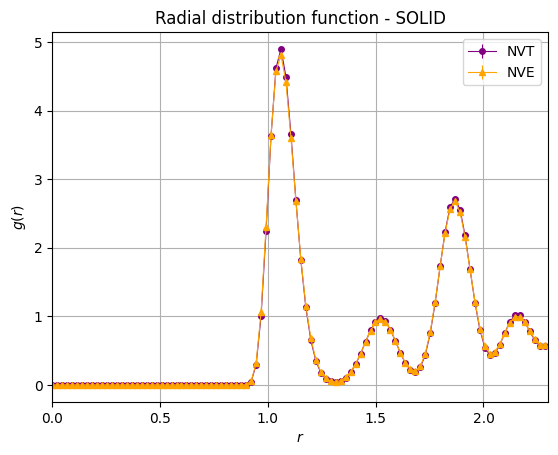

In [29]:
nbin = []
mean_NVT = []
sigma_NVT = []
mean_NVE = []
sigma_NVE = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVt/SOLID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVT.append(float(elements[1]))
        sigma_NVT.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVT,yerr=sigma_NVT,marker='o',markersize=4,label='NVT',linewidth=0.8,color='purple', alpha=1)

nbin = []

with open('GOFR/OUTPUT/Esercizio_07_04/NVE/SOLID/gofr.dat', 'r') as file:
    reader = csv.reader(file)
    next(reader, None) # salta la prima riga
    for list in file:
        elements = list.split()
        nbin.append(float(elements[0]))
        mean_NVE.append(float(elements[1]))
        sigma_NVE.append(float(elements[2]))
file.close()
plt.errorbar(nbin,mean_NVE,yerr=sigma_NVE,marker='^',markersize=4,label='NVE',linewidth=0.8,color='orange', alpha=1)
    
plt.xlabel(r'$r$')
plt.ylabel(r'$g(r)$')
plt.title(r'Radial distribution function - SOLID')
plt.xlim(0,2.3)
plt.grid(True)
plt.legend()
plt.show()